In [1]:
# Packages for reading text reports.
import os, sys
import io
import requests
from PyPDF2 import PdfReader

# Packages for text cleaning
import re
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Packages for exploratory analysis
from wordcloud import WordCloud
from pprint import pprint

# Packages for Latent Dirichlet Allocation model
import gensim.corpora as corpora

# Packages for visualising model results
import pyLDAvis.gensim
import pickle
import pyLDAvis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wylie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Reading provided document as an example. See documentURL value below
documentURL = 'https://www.austrac.gov.au/sites/default/files/2021-11/Financial%20crime%20guide%20-%20Preventing%20' + \
    'misuse%20and%20criminal%20communication%20through%20payment%20text%20fields_0.pdf'
userAgent = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'}

response = requests.get(url = documentURL, headers = userAgent, timeout = 100)
contentBytes = io.BytesIO(response.content)
pdfObj = PdfReader(contentBytes)

In [3]:
textSample = pdfObj.pages[7].extract_text()
display(textSample)

'/  FINANCIAL CRIME GUIDE  - PREVENTING MISUSE AND CRIMINAL COMMUNICATION THROUGH PAYMENT TEXT FIELDSIDENTIFYING THE MISUSE OF \nPAYMENT TEXT FIELDS\nThere is significant variance in the way individuals \ncommunicate via payment text fields. This coupled \nwith the volume of payment messages sent, \npresents challenges for financial service providers \nattempting to identify and assess a payment text \nfield’s risk or severity. The different ways payment \ntext fields can be used, and the challenges \nassociated with identifying them are outlined below.\nIS IT A THREAT OR A JOKE?\nPayment text fields that make explicit threats to a \nvictim or contain profanities that are considered \nabusive or offensive are commonly identified by \nfinancial service providers. However, a significant \nchallenge in identifying legitimate instances of \ncriminal communication is the high volume of false \npositives detected when cross referencing payment \ntext fields with pre-established terms lists d

In [37]:
# re.sub('[\n\t,\.!?*|//•#@$%^&=+-]', '', textSample)

'  FINANCIAL CRIME GUIDE   PREVENTING MISUSE AND CRIMINAL COMMUNICATION THROUGH PAYMENT TEXT FIELDSIDENTIFYING THE MISUSE OF PAYMENT TEXT FIELDSThere is significant variance in the way individuals communicate via payment text fields This coupled with the volume of payment messages sent presents challenges for financial service providers attempting to identify and assess a payment text field’s risk or severity The different ways payment text fields can be used and the challenges associated with identifying them are outlined belowIS IT A THREAT OR A JOKEPayment text fields that make explicit threats to a victim or contain profanities that are considered abusive or offensive are commonly identified by financial service providers However a significant challenge in identifying legitimate instances of criminal communication is the high volume of false positives detected when cross referencing payment text fields with preestablished terms lists deemed to be inappropriate Words or phrases that

<>:2: DeprecationWarning: invalid escape sequence '\.'
<>:2: DeprecationWarning: invalid escape sequence '\.'
C:\Users\Wylie\AppData\Local\Temp\ipykernel_25228\3215448724.py:2: DeprecationWarning: invalid escape sequence '\.'
  noPunctuation = re.sub('[,\.!?*|//•#@$%^&=+-]', '', textSample)


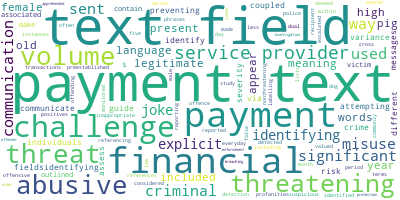

In [4]:
# Text cleaning like removing punctuation
noPunctuation = re.sub('[,\.!?*|//•#@$%^&=+-]', '', textSample)
textCleaned = re.sub('[\n\t]', ' ', noPunctuation).lower()#re.sub('[\n\t]', ' ', noPunctuation)

# Visualise with wordcloud
wordcloud = WordCloud(background_color = 'white', max_words = 5000, contour_width = 3, contour_color = 'steelblue')
wordcloud.generate(textCleaned)
wordcloud.to_image()

In [5]:
stopWords = stopwords.words('english') # words like 'in', 'a', 'an' that are ignored by search engines
# stop_words.extend(['from', 'subject', 're'])

# Function for sentences (Must be str) to words
def toWords(sentences):
    for sentence in sentences:
        yield simple_preprocess(sentence, deacc = True) #deacc=True removes punctuations

# Function to remove stopwords
def removeStopWords(texts):
    return [[w for w in simple_preprocess(t) if w not in stopWords]
            for t in texts]

# Listing words and removing stop words
dataWords = removeStopWords([textSample])
display(dataWords)

[['financial',
  'crime',
  'guide',
  'preventing',
  'misuse',
  'criminal',
  'communication',
  'payment',
  'text',
  'misuse',
  'payment',
  'text',
  'fields',
  'significant',
  'variance',
  'way',
  'individuals',
  'communicate',
  'via',
  'payment',
  'text',
  'fields',
  'coupled',
  'volume',
  'payment',
  'messages',
  'sent',
  'presents',
  'challenges',
  'financial',
  'service',
  'providers',
  'attempting',
  'identify',
  'assess',
  'payment',
  'text',
  'field',
  'risk',
  'severity',
  'different',
  'ways',
  'payment',
  'text',
  'fields',
  'used',
  'challenges',
  'associated',
  'identifying',
  'outlined',
  'threat',
  'joke',
  'payment',
  'text',
  'fields',
  'make',
  'explicit',
  'threats',
  'victim',
  'contain',
  'profanities',
  'considered',
  'abusive',
  'offensive',
  'commonly',
  'identified',
  'financial',
  'service',
  'providers',
  'however',
  'significant',
  'challenge',
  'identifying',
  'legitimate',
  'instances',


In [23]:
long_string

'I am combined strength,'

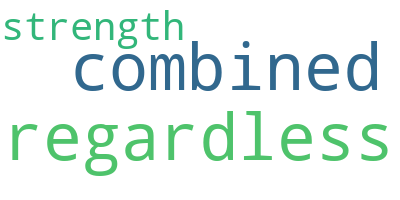

In [24]:
text1 = 'I am regardless'
text2 = 'combined strength,'
long_string = ' '.join([text1, text2])
wordcloud.generate(long_string)
wordcloud.to_image()

In [25]:
simple_preprocess(long_string)

['am', 'regardless', 'combined', 'strength']

In [20]:
' '.join(removeStopWords([textSample])[0])

'financial crime guide preventing misuse criminal communication payment text misuse payment text fields significant variance way individuals communicate via payment text fields coupled volume payment messages sent presents challenges financial service providers attempting identify assess payment text field risk severity different ways payment text fields used challenges associated identifying outlined threat joke payment text fields make explicit threats victim contain profanities considered abusive offensive commonly identified financial service providers however significant challenge identifying legitimate instances criminal communication high volume false positives detected cross referencing payment text fields pre established terms lists deemed inappropriate words phrases dual meaning often appear payment text fields present detection challenges words pig dog everyday meaning appear legitimate non threatening payment text fields also used threatening abusive manner case study expli

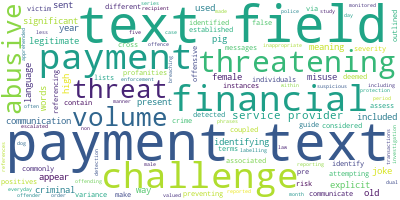

In [21]:
# Visualise with wordcloud
wordcloud = WordCloud(background_color = 'white', max_words = 5000, contour_width = 3, contour_color = 'steelblue')
wordcloud.generate(' '.join(removeStopWords([textSample])[0]))
wordcloud.to_image()

In [6]:
# dataWords[:1][0][:30]

# Create Dictionary
corpusDict = corpora.Dictionary(dataWords)

# Term document frequency
corpus = [corpusDict.doc2bow(t) for t in dataWords]

#View
print(corpus)


[[(0, 3), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 2), (34, 1), (35, 9), (36, 4), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 2), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 12), (76, 3), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 2), (97, 1), (98, 3), (99, 1), (100, 2), (101, 1), (102, 1), (103, 1), (104, 11), (105, 1), (106, 4), (107, 2), (108, 1), (109, 2), (110, 

In [37]:
corpusDict[75]

'payment'

In [35]:
[x for x in corpus[0] if x[1] > 10]

[(75, 12), (104, 11)]

In [33]:
[w for w in dataWords[0] if w == 'payment']

['payment',
 'payment',
 'payment',
 'payment',
 'payment',
 'payment',
 'payment',
 'payment',
 'payment',
 'payment',
 'payment',
 'payment']

In [29]:
# corpusDict[5]
corpus

[[(0, 3),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 3),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 2),
  (32, 1),
  (33, 2),
  (34, 1),
  (35, 9),
  (36, 4),
  (37, 1),
  (38, 1),
  (39, 2),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 2),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 2),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 2),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 2),
  (73, 1),
  (74, 1),
  (75, 12),
  (76, 3),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 2),
  (90, 1),
  (91, 1

In [ ]:
y = [5, 4, 3, 2, 1]
[for x in y:
    x*]

In [7]:
# number of topics
numTopics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus = corpus, id2word = corpusDict, num_topics = numTopics)

# print keywords for the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"fields" + 0.008*"payment" + 0.008*"text" + 0.008*"financial" + '
  '0.008*"threatening" + 0.008*"challenges" + 0.008*"payments" + 0.008*"old" + '
  '0.008*"abusive" + 0.008*"volume"'),
 (1,
  '0.029*"text" + 0.029*"payment" + 0.021*"fields" + 0.015*"threatening" + '
  '0.014*"financial" + 0.011*"payments" + 0.011*"abusive" + 0.011*"volume" + '
  '0.011*"challenges" + 0.011*"misuse"'),
 (2,
  '0.046*"payment" + 0.038*"text" + 0.032*"fields" + 0.019*"threatening" + '
  '0.016*"financial" + 0.014*"abusive" + 0.013*"challenges" + 0.012*"meaning" '
  '+ 0.012*"payments" + 0.011*"service"'),
 (3,
  '0.024*"text" + 0.022*"payment" + 0.019*"fields" + 0.011*"threatening" + '
  '0.011*"financial" + 0.011*"abusive" + 0.011*"service" + 0.011*"volume" + '
  '0.010*"payments" + 0.010*"challenges"'),
 (4,
  '0.052*"payment" + 0.046*"text" + 0.042*"fields" + 0.017*"financial" + '
  '0.017*"volume" + 0.017*"threatening" + 0.014*"payments" + 0.013*"abusive" + '
  '0.013*"service" + 0.012*

In [38]:
doc_lda

In [15]:
lda_model.print_topics()

[(0,
  '0.008*"fields" + 0.008*"payment" + 0.008*"text" + 0.008*"financial" + 0.008*"threatening" + 0.008*"challenges" + 0.008*"payments" + 0.008*"old" + 0.008*"abusive" + 0.008*"volume"'),
 (1,
  '0.029*"text" + 0.029*"payment" + 0.021*"fields" + 0.015*"threatening" + 0.014*"financial" + 0.011*"payments" + 0.011*"abusive" + 0.011*"volume" + 0.011*"challenges" + 0.011*"misuse"'),
 (2,
  '0.046*"payment" + 0.038*"text" + 0.032*"fields" + 0.019*"threatening" + 0.016*"financial" + 0.014*"abusive" + 0.013*"challenges" + 0.012*"meaning" + 0.012*"payments" + 0.011*"service"'),
 (3,
  '0.024*"text" + 0.022*"payment" + 0.019*"fields" + 0.011*"threatening" + 0.011*"financial" + 0.011*"abusive" + 0.011*"service" + 0.011*"volume" + 0.010*"payments" + 0.010*"challenges"'),
 (4,
  '0.052*"payment" + 0.046*"text" + 0.042*"fields" + 0.017*"financial" + 0.017*"volume" + 0.017*"threatening" + 0.014*"payments" + 0.013*"abusive" + 0.013*"service" + 0.012*"challenges"'),
 (5,
  '0.053*"text" + 0.053*"paym

In [12]:
os.path.exists('./results/')

False

In [13]:
# To visualise the topics
pyLDAvis.enable_notebook()
topicsFilePath = os.path.join(f'./results/financialCrime{numTopics}Topics')
if not os.path.exists('./results/'):
    os.mkdir('./results/')

# To prepare visual set prepVis to True
prepVis = False
if prepVis:
    visPrepare = pyLDAvis.gensim.prepare(lda_model, corpus, corpusDict)

    # Dump visual into '/results/' folder
    with open(topicsFilePath, 'wb') as f:
        pickle.dump(visPrepare, f)

In [14]:
# load the visual from '/results/' folder
with open(topicsFilePath, 'rb') as f:
    visPrepare = pickle.load(f)

pyLDAvis.save_html(visPrepare, topicsFilePath + '.html')